In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [221]:
train = pd.read_csv('train.csv')
train.head()

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70


In [222]:
train.shape

(39499, 15)

In [223]:
train.duplicated().sum()

0

In [224]:
train.isnull().sum()

Property_ID                  0
Property_Type                0
Property_Area                0
Number_of_Windows         1654
Number_of_Doors              0
Furnishing                1042
Frequency_of_Powercuts    1383
Power_Backup                 0
Water_Supply                 0
Traffic_Density_Score        0
Crime_Rate                 787
Dust_and_Noise            1219
Air_Quality_Index            0
Neighborhood_Review          0
Habitability_score           0
dtype: int64

In [225]:
test = pd.read_csv('test.csv')
test.head()

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review
0,0x6e93,Apartment,293,3.0,1,Unfurnished,0.0,No,Once in a day - Morning,7.28,Well above average,Medium,152.0,2.52
1,0x8787,Apartment,586,4.0,1,Semi_Furnished,0.0,No,Once in a day - Evening,7.63,Well below average,Medium,92.0,4.16
2,0x6c17,Container Home,305,1.0,2,Semi_Furnished,1.0,No,All time,5.39,Slightly above average,Medium,90.0,2.92
3,0x9dbd,Apartment,258,2.0,1,Semi_Furnished,1.0,No,All time,7.53,Slightly below average,Medium,158.0,3.45
4,0xbfde,Bungalow,3031,12.0,4,Fully Furnished,0.0,No,All time,8.79,Well above average,High,186.0,2.72


In [226]:
test.shape

(10500, 14)

In [227]:
test.isnull().sum()

Property_ID                 0
Property_Type               0
Property_Area               0
Number_of_Windows         445
Number_of_Doors             0
Furnishing                257
Frequency_of_Powercuts    366
Power_Backup                0
Water_Supply                0
Traffic_Density_Score       0
Crime_Rate                212
Dust_and_Noise            330
Air_Quality_Index           0
Neighborhood_Review         0
dtype: int64

In [228]:
combined = pd.concat([train, test], axis = 0)
combined.shape

(49999, 15)

In [229]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 0 to 10499
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_ID             49999 non-null  object 
 1   Property_Type           49999 non-null  object 
 2   Property_Area           49999 non-null  int64  
 3   Number_of_Windows       47900 non-null  float64
 4   Number_of_Doors         49999 non-null  int64  
 5   Furnishing              48700 non-null  object 
 6   Frequency_of_Powercuts  48250 non-null  float64
 7   Power_Backup            49999 non-null  object 
 8   Water_Supply            49999 non-null  object 
 9   Traffic_Density_Score   49999 non-null  float64
 10  Crime_Rate              49000 non-null  object 
 11  Dust_and_Noise          48450 non-null  object 
 12  Air_Quality_Index       49999 non-null  float64
 13  Neighborhood_Review     49999 non-null  float64
 14  Habitability_score      39499 non-null

In [230]:
combined['Property_Type'].value_counts()

Apartment             18449
Single-family home    14579
Duplex                 7326
Bungalow               5343
Container Home         3653
#R%$G&867               649
Name: Property_Type, dtype: int64

In [231]:
combined['Property_Type'] = combined['Property_Type'].replace({'#R%$G&867' : 'Other'})

In [232]:
combined['Number_of_Windows'].value_counts()

4.0     10150
3.0      8990
2.0      8781
5.0      5843
1.0      5397
7.0      2273
6.0      2235
0.0       864
9.0       447
11.0      445
12.0      433
15.0      422
10.0      416
8.0       407
14.0      399
13.0      398
Name: Number_of_Windows, dtype: int64

In [233]:
combined['Number_of_Windows'] = combined['Number_of_Windows'].fillna(4.0)

In [234]:
combined['Frequency_of_Powercuts'].value_counts()

0.0    30966
1.0    12691
2.0     3087
3.0     1506
Name: Frequency_of_Powercuts, dtype: int64

In [235]:
combined['Frequency_of_Powercuts'] = combined['Frequency_of_Powercuts'].fillna(0.0)

In [236]:
combined['Furnishing'].value_counts()

Semi_Furnished     25775
Unfurnished        13003
Fully Furnished     9922
Name: Furnishing, dtype: int64

In [237]:
combined['Crime_Rate'].value_counts()

Well below average        24661
Slightly below average    14612
Slightly above average     6724
Well above average         3003
Name: Crime_Rate, dtype: int64

In [238]:
combined['Dust_and_Noise'].value_counts()

Medium    41822
High       4014
Low        2614
Name: Dust_and_Noise, dtype: int64

In [239]:
x = ['Furnishing', 'Crime_Rate', 'Dust_and_Noise']
for i in x:
    combined[i] = combined[i].fillna(combined[i].value_counts().index[0])

In [240]:
combined['Power_Backup'].value_counts()

No               37688
Yes              11262
NOT MENTIONED     1049
Name: Power_Backup, dtype: int64

In [241]:
combined['Water_Supply'].value_counts()

All time                   24698
Once in a day - Morning    12494
Once in a day - Evening     9933
Once in two days            2425
NOT MENTIONED                449
Name: Water_Supply, dtype: int64

In [242]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [243]:
x = ['Furnishing', 'Crime_Rate', 'Dust_and_Noise', 'Power_Backup', 'Water_Supply', 'Property_Type']
for i in x:
    combined[i] = le.fit_transform(combined[i])

In [244]:
combined = combined.drop('Property_ID', axis = 1)

In [245]:
newtrain = combined.iloc[0:39499, :]
newtrain.shape

(39499, 14)

In [246]:
newtest = combined.iloc[39499: , :]
newtest = newtest.drop('Habitability_score', axis = 1)
newtest.shape

(10500, 13)

In [247]:
x = newtrain.drop('Habitability_score', axis = 1)
y = newtrain['Habitability_score']

In [248]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [249]:
from sklearn.feature_selection import mutual_info_regression

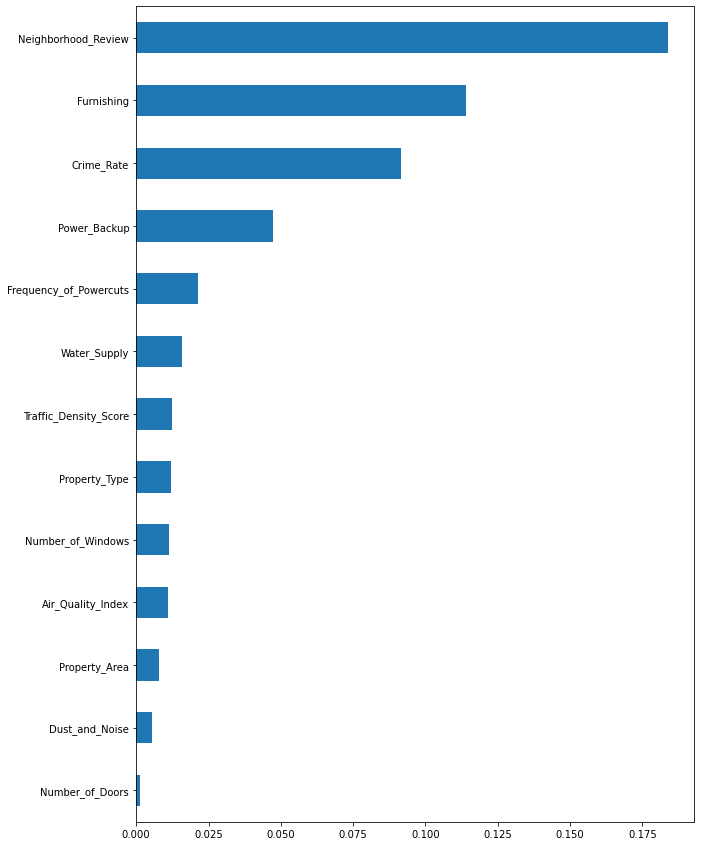

In [250]:
mic = mutual_info_regression(x, y)
feat_importance = pd.Series(mic, index = newtrain.columns[0:-1])
feat_importance.sort_values().plot(kind = 'barh', figsize = [10,15])
plt.show()

In [251]:
features = feat_importance[feat_importance > 0.005].index.to_list()

In [252]:
features

['Property_Type',
 'Property_Area',
 'Number_of_Windows',
 'Furnishing',
 'Frequency_of_Powercuts',
 'Power_Backup',
 'Water_Supply',
 'Traffic_Density_Score',
 'Crime_Rate',
 'Dust_and_Noise',
 'Air_Quality_Index',
 'Neighborhood_Review']

----------

In [253]:
x = newtrain[features]
y = newtrain['Habitability_score']

In [254]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [255]:
from sklearn.metrics import r2_score

In [212]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
y_pred = rf.fit(x_train, y_train).predict(x_test)
print(max(0, 100*(r2_score(y_test , y_pred))))

82.1578490028309


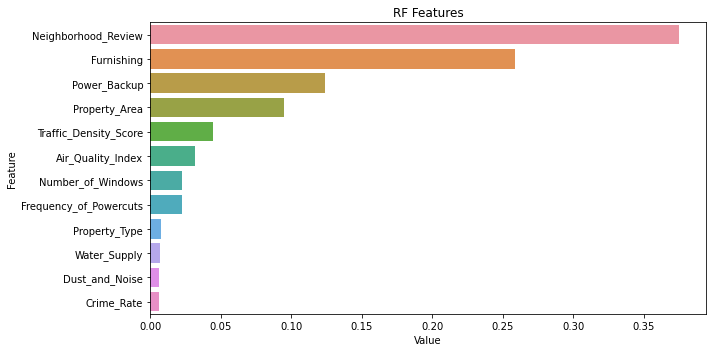

In [213]:
feature_imp = pd.DataFrame(sorted(zip(rf.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('RF Features')
plt.tight_layout()
plt.show()

In [171]:
x_train = newtrain.drop('Habitability_score', axis = 1)
y_train = newtrain['Habitability_score']
x_test = newtest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
y_pred = rf.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'Property_ID' : test.Property_ID, 'Habitability_score': y_pred})
solution.to_csv('RF4444.csv', index = False)